# 결정 트리(Decision Tree)
- 머신러닝 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습으 ㄹ통해 자동을 찾아내 트리(Tree)기반의 분류 규칙을 만드는 것
- if/else 기반으로 나타내는 것




## 1. 결정 트리의 구조

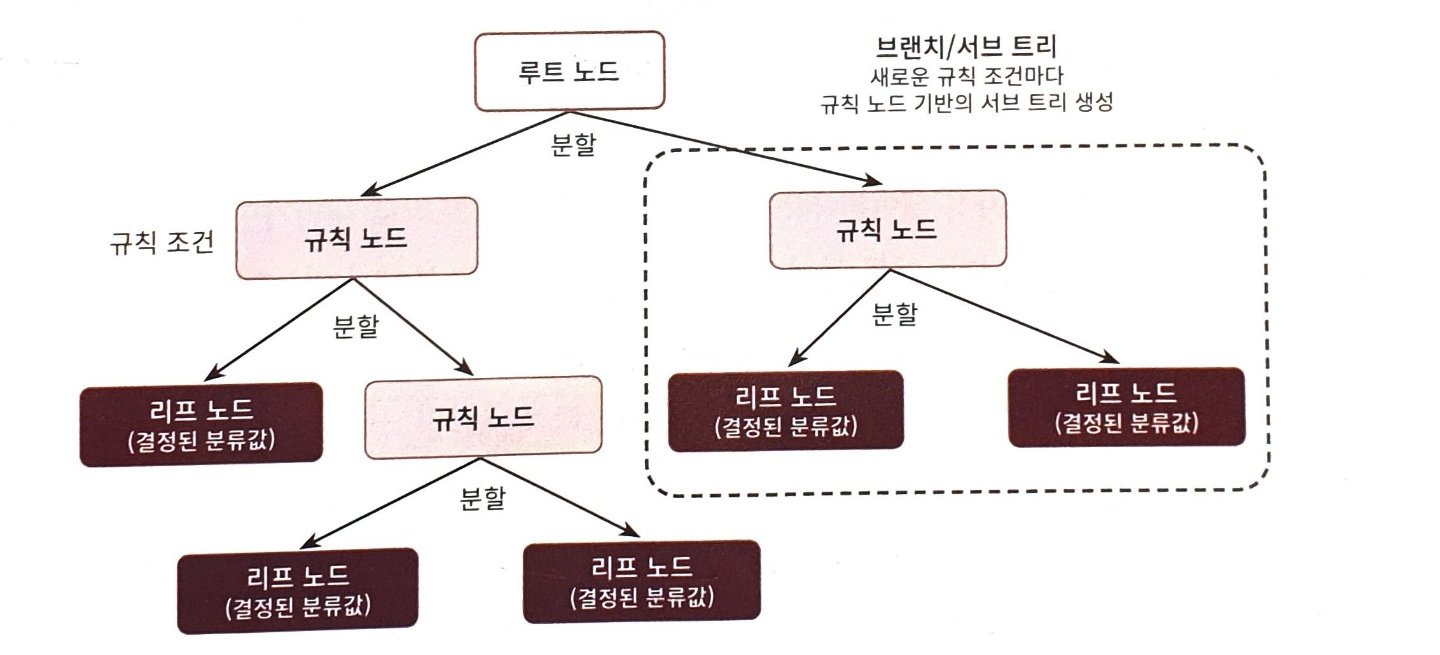

- 규칙노드(Decision Node) : 규칙 조건이 됨
- 리프노드(Leaf Node) : 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성됨

## 2. iris 데이터 예제를 통해 살펴보는 tree

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # tree 그림

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
iris=load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['label']=iris.target

In [4]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 이진분류 예시  tree를 보기 위해서 Setosa(0) 종은 제거하고, Versicolor(1)와 Virginica(2)종만 남겨서 분류를 실행한다

In [5]:
iris_new=iris_data[iris_data['label']>=1]

In [6]:
iris_new['label']=iris_new['label']-1
iris_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [7]:
# 학습을 위해 설명변수와 예측변수를 나눈다
iris_x=iris_new.drop(columns=['label'])
iris_y=iris_new['label']

In [8]:
# 모델 훈련
model_dt=DecisionTreeClassifier(max_depth=5)
model_dt=model_dt.fit(iris_x,iris_y)

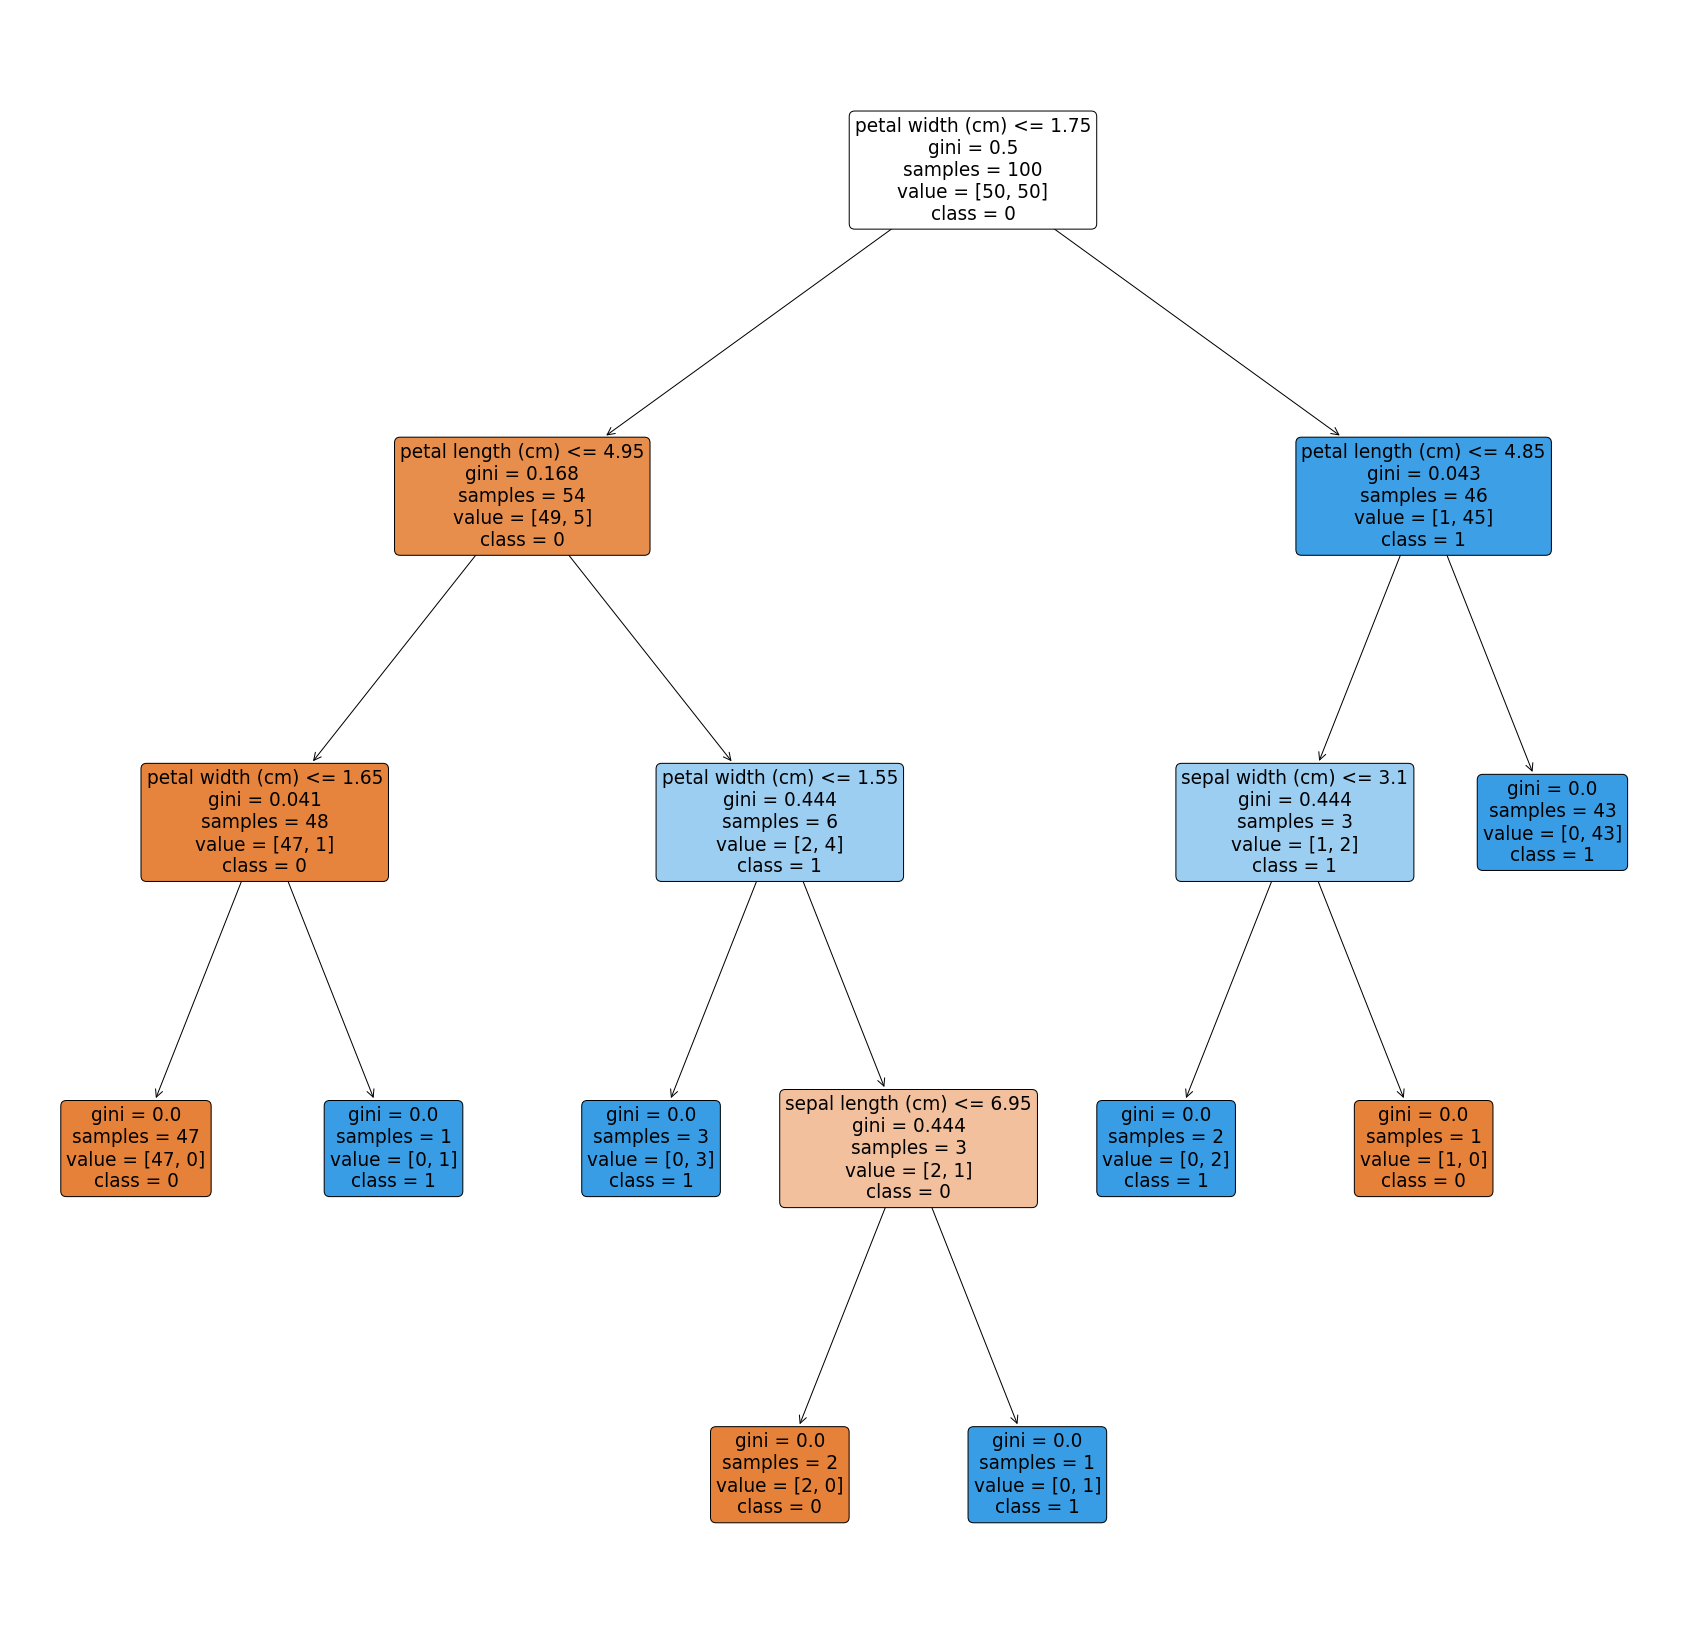

In [9]:
plt.figure(figsize=(30,30))

feature_names=iris_x.columns
target_names=['0','1']


plot_tree(model_dt, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png')

## 3. 결정트리의 알고리즘
### 결정 트리의 최종 목적 : 최대한 균일한 데이터를 구성하도록 분할하는 것

### 균일한 데이터란?
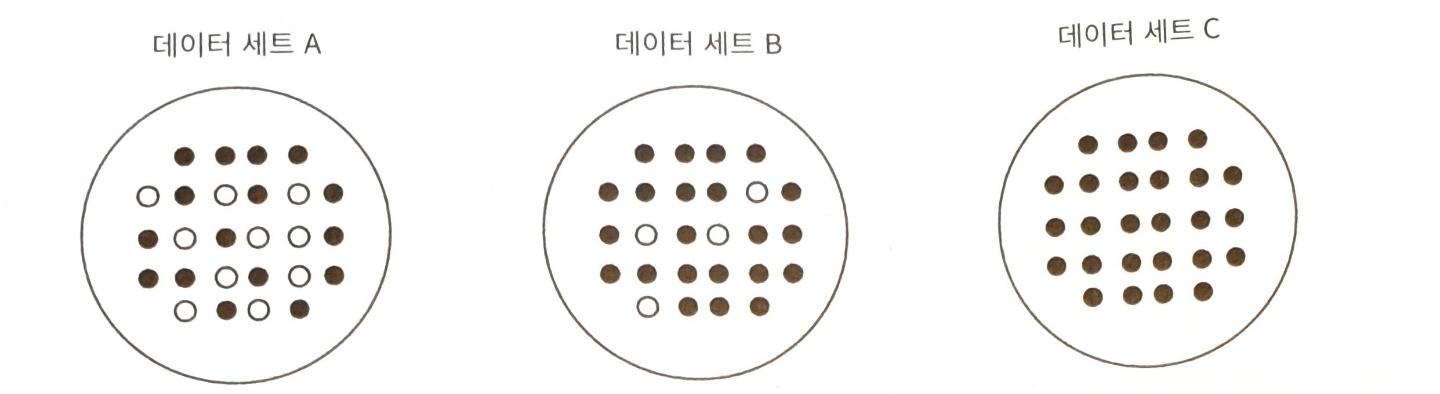

### C > B > A 순으로 데이터의 균일도가 높다.

### 즉, 결정트리는 최종 리프노드의 균일도가 높도록 규칙노드의 규칙을 정한다

- 지니계수 : 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로 0에서 1로 갈수록 불평등함을 나타낸다. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

## 4. 결정 트리 모델의 특징

### 결정 트리 모델은 '균일도'라는 룰을 기반으로 하고 있어서 다음과 같은 특징을 가진다.

#### 장점
- 쉽고, 직관적이다. 
- 피처의 스케일링나 정규화 등의 사전 가공 영향도가 크지 않음

#### 단점
- 과적합으로 알고리즘 성능이 떨어지며, 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 우리의 목적 : 실제 상황, 새로운 데이터에서도 잘 적용이 되는 모델을 생성하는 것

하지만, 무조건 '균일도'를 낮추기만 하는 트리모델은 너무 많은 것을 학습해버린다. 결국 보편적인 특징이 아닌 현재 가지고 있는 데이터 만의 특징이나 이상치를 학습해 버려서 새로운 데이터에서 잘 적용되지 않을 수가 있다.

### 현재 가진 데이터(train data)에 너무 강하게 학습해서 보편적인 특징을 잡아내지 못하는 것을 과적합이라고 한다

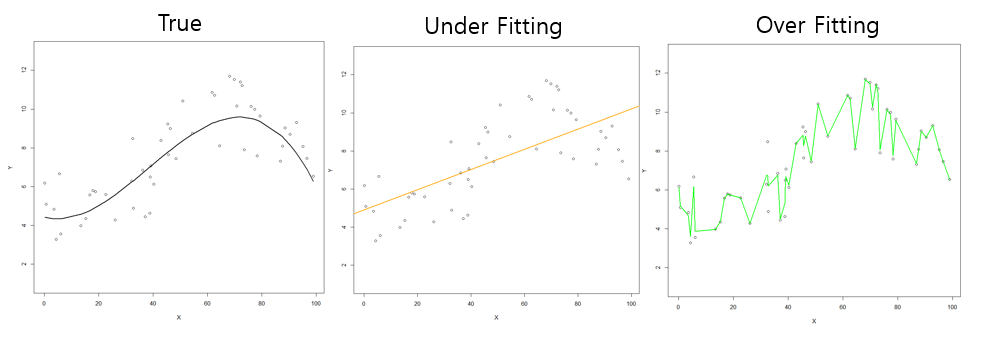

## 5. 하이퍼 파라미터 튜닝

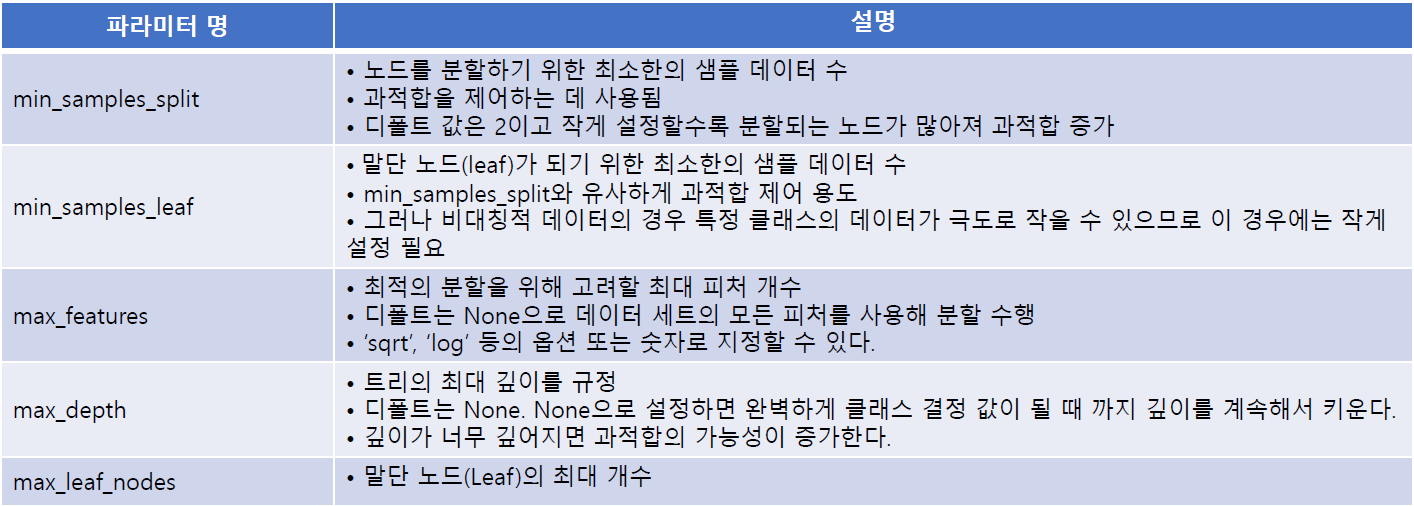

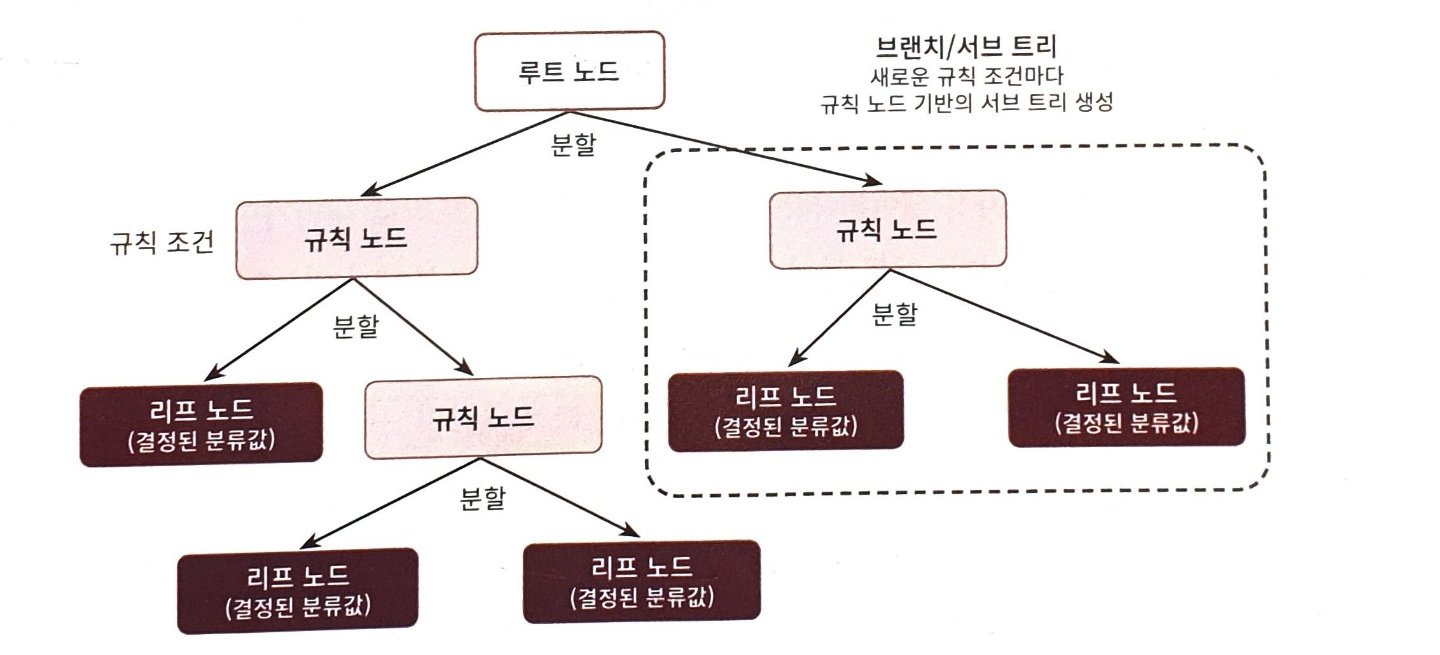

## 6. 하이퍼 파라미터 튜닝에 따른 모델 변화

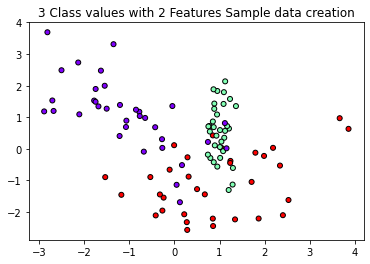

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

### 과적합 (하이퍼 파라미터 튜닝 x)

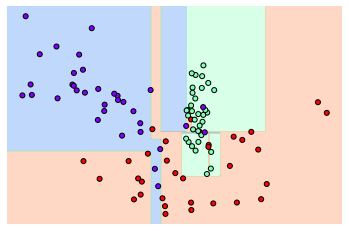

In [12]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 하이퍼 파라미터 튜닝을 통한 과적합 제거

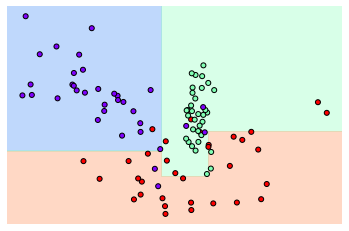

In [13]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 7. 학습/검증용 데이터 세트 분리
- 실제 데이터에서 모델이 잘 작동하는지, 현재의 데이터에 과적합되지는 않았는지 확인할 방법이 필요하다
- 소유한 데이터에서 일정 비율의 데이터를 검증용 데이터로 사용하여 과적합 여부를 판단할 수 있다. 
- 이를 위해 sklearn의 train_test_split() 함수를 사용한다

### Estimator 이해 및 fit(), predict() 메서드
- 데이터 학습을 통해 생성한 모델을 추정자 = Estimator라고 한다.
- 지도학습에서 주어진 데이터를 학습할 때 fit()을 통해서 진행한다. fit(train_x, train_y) 형태
- 새로운 데이터를 학습된 모델에 대입하여 예측된 값을 생성하는 것을 predict()를 통해서 진행한다.  predict(test_x) 형태

### 학습과 예측을 동일한 데이터 세트로 수행한 결과

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
iris=load_iris()
dt_clf=DecisionTreeClassifier()

train_data=iris.data
train_label=iris.target

dt_clf.fit(train_data,train_label)

# 학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)


In [16]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
print('예측 정확도:', accuracy_score(train_label,pred))

예측 정확도: 1.0


#### train 데이터 (기존 데이터)를 전체를 사용해서  모델링을 진행하면 모델의 과적합 여부나 범용성을 판단할 수 없다. 
### 그러므로 데이터를 훈련용 데이터와 검증용 데이터로 나누어 평가해본다. 


### sklearn.model_selection 의 train_test_split 함수 사용
#### train_test_split( )는 첫 번째 파라미터로 피처 데이터 세트(= X or 설명변수), 두 번째 파라미터로 레이블 데이터 세트(= Y or 예측변수)를 입력는다. 그리고 선택적으로 다음 파라미터들을 입력받는다. 


- test_size : 전체 데이터에서 테스트 세트 크기를 얼마로 샘플링 할 것인가. (여기서, 테스트 세트 = 검증요 데이터 세트)


- train_size : 학습용 데이터 세트 크기를 얼마로 샘플링 할지 결정. 주로 'test_size' 를 통상적으로 사용해서 train_size는 잘 사용되지 않는다.


- shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정. 디폴트는 True


- random state : 함수를 호출하여 사용할 때마다 동일한 학습/ 검증요 데이터 세트를 생성하기 위해 주어지는 난수 값. 지정해주지 않으면 train_test_split()함수를 사용할 때마다 다르게 무작위로 데이터를 분리함

### 학습/ 검증용 데이터를 분리해서 모델에 대한 성능평가

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
dt_clf=DecisionTreeClassifier()
iris_data=load_iris()

X_train,X_test,y_train,y_test= train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)

In [20]:
X_train.shape

(105, 4)

In [21]:
X_test.shape

(45, 4)

In [22]:
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)

In [23]:
print('예측 정확도:', accuracy_score(y_test,pred))

예측 정확도: 0.9555555555555556


### 검증용 데이터를 활용한 하이퍼 파라미터 수정

- min_samples_leaf 파라미터를 튜닝하고 싶음. 
- 이때 전체 데이터를 학습시켜서 훈련시키면 무조건 min_samples_leaf가 작을수록 깊은 TREE를 생성하여 과적합의 확률이 올라간다.  
- 하지만 min_samples_leaf가 작을수록 상세한 정보를 학습하는 것도 맞다.
- min_samples_leaf를 조정하므로써 어느정도까지 상세한 정보를 학습해야하는지를 찾아내고 싶다. 
- 데이터를 학습용/검증용으로 나눠서 검증용에서 가장 잘 작동하는 min_samples_leaf 옵션을 찾아본다. 

In [24]:
# 데이터
iris_data=load_iris()
X_train,X_test,y_train,y_test= train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)

#### min_sample_leaf 에 대한 tunning

In [25]:
# min_samples_leaf 옵션을 각각 다르게 하여 모델을 생성
dt_clf_1=DecisionTreeClassifier(min_samples_leaf=1)
dt_clf_3=DecisionTreeClassifier(min_samples_leaf=3)
dt_clf_5=DecisionTreeClassifier(min_samples_leaf=5)
dt_clf_10=DecisionTreeClassifier(min_samples_leaf=10)
dt_clf_20=DecisionTreeClassifier(min_samples_leaf=20)

In [26]:
# 모든 모델을 학습
dt_clf_1.fit(X_train,y_train)
dt_clf_3.fit(X_train,y_train)
dt_clf_5.fit(X_train,y_train)
dt_clf_10.fit(X_train,y_train)
dt_clf_20.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20)

In [27]:
# 학습된 모델을 사용하여 예측
pred_1=dt_clf_1.predict(X_test)
pred_3=dt_clf_3.predict(X_test)
pred_5=dt_clf_5.predict(X_test)
pred_10=dt_clf_10.predict(X_test)
pred_20=dt_clf_20.predict(X_test)

In [28]:
print('min_samples_leaf=1의 예측 정확도:', accuracy_score(y_test,pred_1))
print('min_samples_leaf=3의 예측 정확도:', accuracy_score(y_test,pred_3))
print('min_samples_leaf=5의 예측 정확도:', accuracy_score(y_test,pred_5))
print('min_samples_leaf=10의 예측 정확도:', accuracy_score(y_test,pred_10))
print('min_samples_leaf=20의 예측 정확도:', accuracy_score(y_test,pred_20))

min_samples_leaf=1의 예측 정확도: 0.9555555555555556
min_samples_leaf=3의 예측 정확도: 0.9555555555555556
min_samples_leaf=5의 예측 정확도: 0.9555555555555556
min_samples_leaf=10의 예측 정확도: 0.9333333333333333
min_samples_leaf=20의 예측 정확도: 0.9333333333333333


#### max_depth 에 대한 tunning

In [29]:
dt_clf_dep_1=DecisionTreeClassifier(max_depth=1)
dt_clf_dep_2=DecisionTreeClassifier(max_depth=2)
dt_clf_dep_3=DecisionTreeClassifier(max_depth=3)
dt_clf_dep_4=DecisionTreeClassifier(max_depth=4)
dt_clf_dep_5=DecisionTreeClassifier(max_depth=5)
dt_clf_dep_7=DecisionTreeClassifier(max_depth=7)
dt_clf_dep_10=DecisionTreeClassifier(max_depth=10)

In [30]:
dt_clf_dep_1.fit(X_train,y_train)
dt_clf_dep_2.fit(X_train,y_train)
dt_clf_dep_3.fit(X_train,y_train)
dt_clf_dep_4.fit(X_train,y_train)
dt_clf_dep_5.fit(X_train,y_train)
dt_clf_dep_7.fit(X_train,y_train)
dt_clf_dep_10.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [31]:
pred_dep_1=dt_clf_dep_1.predict(X_test)
pred_dep_2=dt_clf_dep_2.predict(X_test)
pred_dep_3=dt_clf_dep_3.predict(X_test)
pred_dep_4=dt_clf_dep_4.predict(X_test)
pred_dep_5=dt_clf_dep_5.predict(X_test)
pred_dep_7=dt_clf_dep_7.predict(X_test)
pred_dep_10=dt_clf_dep_10.predict(X_test)

In [32]:
print('max_depth=1의 예측 정확도:', accuracy_score(y_test,pred_dep_1))
print('max_depth=2의 예측 정확도:', accuracy_score(y_test,pred_dep_2))
print('max_depth=3의 예측 정확도:', accuracy_score(y_test,pred_dep_3))
print('max_depth=4의 예측 정확도:', accuracy_score(y_test,pred_dep_4))
print('max_depth=5의 예측 정확도:', accuracy_score(y_test,pred_dep_5))
print('max_depth=7의 예측 정확도:', accuracy_score(y_test,pred_dep_7))
print('max_depth=10의 예측 정확도:', accuracy_score(y_test,pred_dep_10))


max_depth=1의 예측 정확도: 0.6444444444444445
max_depth=2의 예측 정확도: 0.9333333333333333
max_depth=3의 예측 정확도: 0.9555555555555556
max_depth=4의 예측 정확도: 0.9555555555555556
max_depth=5의 예측 정확도: 0.9555555555555556
max_depth=7의 예측 정확도: 0.9555555555555556
max_depth=10의 예측 정확도: 0.9555555555555556


## 8. 교차검증 : cross_validation

### 학습용/ 검증용 데이터 분리하여 분석시 문제점
- 검증용 데이터를 하나만 사용할 경우 해당 검증용 데이터에 과적합이 될수도 있다.
- 전체 데이터의 정보를 사용하지 못하고 하이퍼 파라미터를 찾아낸다


### 이러한 문제점을 해결하기 위해 교차검증 : Cross_validation을 사용한다


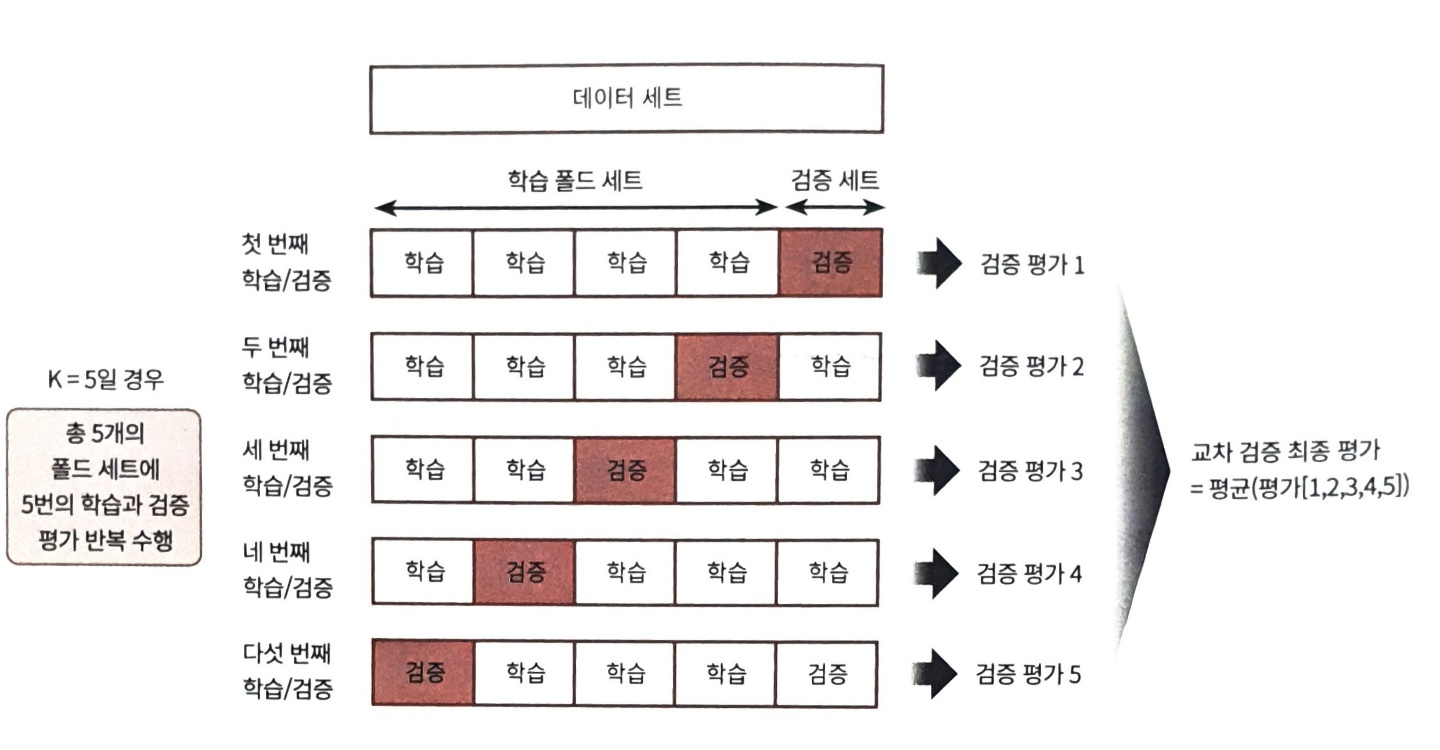

### sklearn의 cross_val_score()함수 사용

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [34]:
iris_data=load_iris()
dt_clf=DecisionTreeClassifier()

data=iris_data.data
label=iris_data.target

In [37]:
# 성능지표는 accuracy(정확도)
scores=cross_val_score(dt_clf,data,label,scoring="accuracy",cv=5)

print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9667 0.9667 0.9    1.     1.    ]
평균 검증 정확도: 0.9667


In [36]:
# 하이퍼 파라미터 튜닝
dt_clf_dep_1=DecisionTreeClassifier(max_depth=1)
dt_clf_dep_2=DecisionTreeClassifier(max_depth=2)
dt_clf_dep_3=DecisionTreeClassifier(max_depth=3)
dt_clf_dep_4=DecisionTreeClassifier(max_depth=4)
dt_clf_dep_5=DecisionTreeClassifier(max_depth=5)
dt_clf_dep_7=DecisionTreeClassifier(max_depth=7)
dt_clf_dep_10=DecisionTreeClassifier(max_depth=10)

In [38]:
scores_1=cross_val_score(dt_clf_dep_1,data,label,scoring="accuracy",cv=5)
scores_2=cross_val_score(dt_clf_dep_2,data,label,scoring="accuracy",cv=5)
scores_3=cross_val_score(dt_clf_dep_3,data,label,scoring="accuracy",cv=5)
scores_4=cross_val_score(dt_clf_dep_4,data,label,scoring="accuracy",cv=5)
scores_5=cross_val_score(dt_clf_dep_5,data,label,scoring="accuracy",cv=5)
scores_7=cross_val_score(dt_clf_dep_7,data,label,scoring="accuracy",cv=5)
scores_10=cross_val_score(dt_clf_dep_10,data,label,scoring="accuracy",cv=5)

In [39]:
print('max_depth=1의 CV 예측 정확도:', np.round(np.mean(scores_1),4))
print('max_depth=2의 CV 예측 정확도:', np.round(np.mean(scores_2),4))
print('max_depth=3의 CV 예측 정확도:', np.round(np.mean(scores_3),4))
print('max_depth=4의 CV 예측 정확도:', np.round(np.mean(scores_4),4))
print('max_depth=5의 CV 예측 정확도:', np.round(np.mean(scores_5),4))
print('max_depth=7의 CV 예측 정확도:', np.round(np.mean(scores_7),4))
print('max_depth=10의 CV 예측 정확도:', np.round(np.mean(scores_10),4))


max_depth=1의 CV 예측 정확도: 0.6667
max_depth=2의 CV 예측 정확도: 0.9333
max_depth=3의 CV 예측 정확도: 0.9733
max_depth=4의 CV 예측 정확도: 0.9533
max_depth=5의 CV 예측 정확도: 0.9667
max_depth=7의 CV 예측 정확도: 0.96
max_depth=10의 CV 예측 정확도: 0.9667


## 9. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
### 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾을 수 있다

In [60]:
# 예시
grid_parameters={'max_depth':[1,2,3,5,7],
                'min_samples_split':[2,3,5]}

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
dtree=DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
grid_parameters={'max_depth':[1,2,3,5,7],
                'min_samples_split':[2,3,4,5]}

# refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree=GridSearchCV(dtree,param_grid=grid_parameters,cv=3,refit=True)

In [67]:
# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(data,label)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 4, 5]})

In [68]:
# GridSearchCV  결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000614,0.000446,0.000273,0.000387,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.66,0.66,0.66,0.660000,0.000000,17
1,0.000333,0.000471,0.000510,0.000408,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.66,0.66,0.66,0.660000,0.000000,17
2,0.000645,0.000480,0.000332,0.000470,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.66,0.66,0.66,0.660000,0.000000,17
3,0.000329,0.000465,0.000298,0.000421,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.66,0.66,0.66,0.660000,0.000000,17
4,0.000332,0.000470,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.96,0.92,0.92,0.933333,0.018856,13
5,0.000799,0.001130,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.96,0.92,0.92,0.933333,0.018856,13
6,0.000163,0.000230,0.000332,0.000469,2,4,"{'max_depth': 2, 'min_samples_split': 4}",0.96,0.92,0.92,0.933333,0.018856,13
7,0.000645,0.000457,0.000000,0.000000,2,5,"{'max_depth': 2, 'min_samples_split': 5}",0.96,0.92,0.92,0.933333,0.018856,13
8,0.000333,0.000470,0.000332,0.000470,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.98,0.94,0.96,0.960000,0.016330,8
9,0.000000,0.000000,0.000719,0.000513,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.98,0.94,1.00,0.973333,0.024944,1


In [69]:
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.660000,17,0.66,0.66,0.66
1,"{'max_depth': 1, 'min_samples_split': 3}",0.660000,17,0.66,0.66,0.66
2,"{'max_depth': 1, 'min_samples_split': 4}",0.660000,17,0.66,0.66,0.66
3,"{'max_depth': 1, 'min_samples_split': 5}",0.660000,17,0.66,0.66,0.66
4,"{'max_depth': 2, 'min_samples_split': 2}",0.933333,13,0.96,0.92,0.92
5,"{'max_depth': 2, 'min_samples_split': 3}",0.933333,13,0.96,0.92,0.92
6,"{'max_depth': 2, 'min_samples_split': 4}",0.933333,13,0.96,0.92,0.92
7,"{'max_depth': 2, 'min_samples_split': 5}",0.933333,13,0.96,0.92,0.92
8,"{'max_depth': 3, 'min_samples_split': 2}",0.960000,8,0.98,0.94,0.96
9,"{'max_depth': 3, 'min_samples_split': 3}",0.973333,1,0.98,0.94,1.00


In [72]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:',np.round(grid_dtree.best_score_,5))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.97333
